In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

## 读取文件

In [3]:
input_path='./data/'
input_file = '20220727_D14-colon-rectrum_advillin-FLPO_glp1r-cre_FL-catch_10hz-20s_10hz-60s.txt'
df=pd.read_csv(os.path.join(input_path,input_file),
     sep='\t',
     skiprows=11,header=None, usecols=[0, 1, 2,3],names = ['min', 'ch1', 'ch2', 'ch3'])
df.head()

,min,ch1,ch2,ch3
0,10.3015,4.75358,4.89361,0.104065
1,10.3015,4.74655,4.88035,0.098877
2,10.3015,4.75358,4.88698,0.095215
3,10.3015,4.74655,4.90688,0.102539
4,10.3015,4.76764,4.88035,0.103149


## 画图

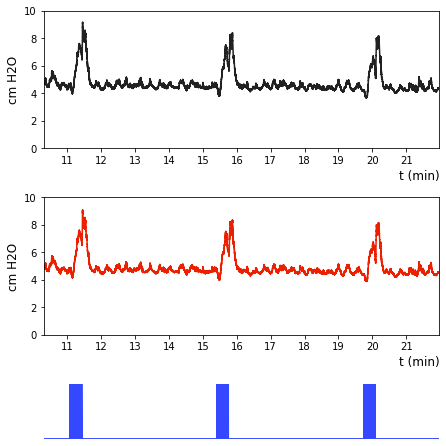

In [4]:

def plot_graph(time_start=0, time_end=60, y_min=3,
               y_max=9, channels='both', figsize=(8, 8), panels_height=[1, 1, 1],
               colors_dict={'ch1': '#046cb0', 'ch2': '#f72400', 'ch3': '#000'},
               x_tick_space=1,
               y_tick_space=1,
               grid=False):
    # settings
    channel_dict = {
        '1': (2, ['ch1', 'ch3']),
        '2': (2, ['ch2', 'ch3']),
        'both': (3, ['ch1', 'ch2', 'ch3']),
        '12': (3, ['ch1', 'ch2', 'ch3'])
    }
    x_major_locator = MultipleLocator(x_tick_space)
    y_major_locator = MultipleLocator(y_tick_space)

    panels, channel_li = channel_dict[channels]
    height_ratios = panels_height[0:panels-1]
    height_ratios.append(panels_height[-1])
    
    # deal with df_plot
    df_plot = df[(df["min"] > time_start) & (df["min"] < time_end)].copy()
    df_plot['ch3'] = df_plot['ch3'].astype('int64')*4

    # plot
    fig, axes = plt.subplots(panels, 1, figsize=figsize, sharex=False, sharey=False,
                             gridspec_kw={'height_ratios': height_ratios})

    for i, axi in enumerate(axes):
        if i < 3:
            axi.set_ylim(y_min, y_max)
            axi.set_xlabel("t (min)", size=12, loc="right")
            axi.set_ylabel("cm H2O", size=12)

        axi.plot(df_plot['min'], df_plot[channel_li[i]],
                 color=colors_dict[channel_li[i]])
        axi.margins(0)
        axi.grid(grid)
        axi.xaxis.set_major_locator(x_major_locator)
        axi.yaxis.set_major_locator(y_major_locator)
    # axes[-1].margins(y=-0.2)
    axes[-1].axis('off')
    fig.tight_layout()
    fig = plt.gcf()
    fig.set_facecolor('white')
    plt.show()
    return fig

fig=plot_graph(
    time_start=0, time_end=90,
    y_min=0,
    y_max=10,
    x_tick_space=1,
    y_tick_space=2,
    channels='12',
    figsize=(6.3, 6.3),
    panels_height=[1, 1, 0.4],
    colors_dict={
        'ch1': '#212121',
        'ch2': '#ea2000',
        'ch3': '#3449ff'
    },
    grid=False,
)


## 保存文件

In [5]:

output_path='./data'
output_name=os.path.basename(input_file).split('.')[0]
fig.savefig(f'{output_path}/{output_name}.tif',dpi=200)